# Assignment 12
## Jason Zhongyun Zhang

In [ ]:
#pip install python-edgar

In [1]:
import pandas as pd
import numpy as np
import edgar

In [5]:
edgar.download_index('/Users/Zhong/Desktop/test', since_year = 1995)

In [178]:
#to read and concatenate all the tsv files
years = list(range(1995, 2020))
quarters = ['QTR1', 'QTR2', 'QTR3', 'QTR4']
history = [(y, q) for y in years for q in quarters]

extracted_8k_filing = pd.DataFrame({"CIK": range(0)})

for i in range(0, len(history)):
    s = '/Users/Zhong/Desktop/test/{}-{}.tsv'.format(history[i][0], history[i][1])
    input_list =pd.read_csv(s, delimiter='|', encoding='utf-8', header=None)
    input_list.columns = ['CIK', 'Company Name', 'Form Type', 'Date Filed', 'Path', 'Link']
    
    #to choose the 8k and get 100 random samples for each year-quarter
    sample_each_yr_quarter = input_list[input_list['Form Type']=="8-K"].sample(100)
    
    extracted_8k_filing = pd.concat([extracted_8k_filing, sample_each_yr_quarter],\
                                    join="outer", axis = 0)
    
extracted_8k_filing['Date Filed'] = pd.to_datetime((extracted_8k_filing['Date Filed'].astype(str)))

In [ ]:
funda = pd.read_csv('funda_textual.csv')
funda.CUSIP = funda['CUSIP'].str[0:6]
funda = funda.drop(columns=['FYEAR']).reset_index(drop=True).drop_duplicates()

In [15]:
dsf = pd.read_csv('dsf_textual.csv', low_memory=False)

In [17]:
dsf['CUSIP'] = dsf['CUSIP'].str[0:6]

In [20]:
dsf_cik = dsf.merge(funda[['CIK','CUSIP']], how="left", left_on = 'CUSIP', right_on = 'CUSIP')

In [39]:
#to merge the dsf dataset and 8-K filing dataset
dsf_cik['DATE'] = pd.to_datetime(dsf_cik['DATE'],format='%m/%d/%Y')
dsf_filing_merged = dsf_cik.merge(extracted_8k_filing[['CIK','Filing','Date Filed']],\
                                  how='left', left_on=['CIK','DATE'],\
                                  right_on=['CIK','Date Filed'])

In [84]:
dsf_filing_merged['RET'] = pd.to_numeric(dsf_filing_merged['RET'], errors=('coerce'))

In [323]:
filing_indices = dsf_filing_merged[dsf_filing_merged['Filing']==1].index.values.tolist()
dsf_filing_merged[dsf_filing_merged['Filing']==1]

,Unnamed: 0,PERMNO,DATE,CUSIP,VOL,RET,SHROUT,VWRETD,CIK,Filing,Date Filed,CAR_0day,CAR_1day,CAR_2day,CAR_3day,CAR_5day
1974,1974,10001,2001-11-01,367204,1800.0,-0.002745,2518.0,0.020704,43350.0,1.0,2001-11-01,-0.007038,-0.024104,-0.023050,-0.008216,-0.002318
5116,5116,10001,2014-04-29,367204,181293.0,-0.014414,10452.0,0.005631,43350.0,1.0,2014-04-29,-0.016245,-0.036614,-0.037268,-0.056770,-0.034634
7705,7705,10002,2000-12-27,05978R,1130.0,-0.056338,8587.0,0.013912,783739.0,1.0,2000-12-27,-0.056030,0.065638,0.034249,0.034249,0.006756
28037,28037,10025,2016-09-14,001031,64322.0,-0.006047,5114.0,-0.000541,785787.0,1.0,2016-09-14,-0.007593,0.005180,-0.001186,-0.001186,0.001395
33197,33197,10026,2014-02-20,466032,28043.0,0.015578,18691.0,0.006448,785956.0,1.0,2014-02-20,0.009266,0.003265,0.007566,0.007566,0.013112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49704703,49704703,93426,2015-12-15,92835K,73513.0,0.025283,12144.0,0.011313,1487952.0,1.0,2015-12-15,NaN,NaN,NaN,NaN,NaN
49704746,49704746,93426,2016-02-18,92835K,48581.0,0.011872,12144.0,-0.004207,1487952.0,1.0,2016-02-18,NaN,NaN,NaN,NaN,NaN
49706960,49706960,93427,2015-05-29,G3323L,69753.0,-0.001099,35426.0,-0.005812,1408710.0,1.0,2015-05-29,NaN,NaN,NaN,NaN,NaN
49716302,49716302,93434,2012-10-02,785135,97357.0,0.091045,7873.0,0.001180,1477246.0,1.0,2012-10-02,NaN,NaN,NaN,NaN,NaN


In [37]:
filings_senti_quintiles = extracted_8k_filing[['CIK','Date Filed', 'Senti_dif', 'quintile']]

In [ ]:
filings_senti_quintiles['Date Filed'] = pd.to_datetime(filings_senti_quintiles['Date Filed'],format='%Y-%m-%d')

# Step 2: Event Studies

In [16]:
#dsf_filing_merged = pd.read_csv('dsf_filing_merged.csv', low_memory=False)
#dsf_filing_merged['DATE'] = pd.to_datetime(dsf_filing_merged['DATE'],format='%Y-%m-%d')


In [27]:
dsf_filing_merged = dsf_filing_merged.drop(columns=['Unnamed: 0','Filing','Date Filed'])
dsf_filing_merged = dsf_filing_merged.merge(filings_senti_quintiles,\
                                          how='left', left_on=['DATE','CIK'],
                                          right_on=['Date Filed','CIK'])

In [13]:
#to get the data that contains the permnos that filed at least 1 8-K
#permonos = dsf_filing_merged.PERMNO[dsf_filing_merged.index.isin(filing_indices)]
#dsf_filing_filtered = dsf_filing_merged[dsf_filing_merged.PERMNO.isin(permonos)]
#dsf_filing_filtered = dsf_filing_filtered.drop(dsf_filing_filtered.columns[0], axis=1)

In [25]:
#dsf_filing_filtered.to_csv('dsf_filing_filtered.csv')

In [415]:
from scipy import stats
from datetime import datetime, timedelta

In [4]:
#to read the previously filtered data
#dsf_filing_merged = pd.read_csv('dsf_filing_filtered.csv', low_memory=False)
#dsf_filing_merged['DATE'] = pd.to_datetime(dsf_filing_merged['DATE'],format='%Y-%m-%d')

In [64]:
#to write a function that calculates the cumulative abnormal returns
def CAR (window):
    car = 0
    filing_window_days = dsf_filing_merged[(dsf_filing_merged.DATE >= \
                                            filing_date-timedelta(days=window)) & \
                      (dsf_filing_merged.DATE <= filing_date+timedelta(days=window)) & \
                      (dsf_filing_merged.PERMNO == permno)]

    for index, row in filing_window_days.iterrows():
        car += row['RET']-(alpha+beta*row['VWRETD'])

    return car

In [59]:
# to add all the indices for all the CIK-dates that filed the 8k
filing_indices = dsf_filing_merged[dsf_filing_merged.quintile>=0].index.values.tolist()

In [ ]:
#to add cumulative abnormal returns for windows of +- 0, 1, 2, 3, 5 days around dates of 8-K filings

for i in filing_indices:
    
    try:
        permno = dsf_filing_merged.loc[i].PERMNO
        filing_date = dsf_filing_merged.loc[i].DATE

        rolling_255d = dsf_filing_merged[(dsf_filing_merged.DATE >= filing_date-timedelta(days=345)) & \
                                         (dsf_filing_merged.DATE <= filing_date-timedelta(days=91)) & \
                                         (dsf_filing_merged.PERMNO == permno)]

        beta, alpha = stats.linregress(rolling_255d.VWRETD,rolling_255d.RET)[0:2]

        dsf_filing_merged.loc[i,'CAR_0day'] = dsf_filing_merged.loc[i]['RET']-\
                                              (alpha+beta*dsf_filing_merged.loc[i]['VWRETD'])
        dsf_filing_merged.loc[i,'CAR_1day'] = CAR(1)
        dsf_filing_merged.loc[i,'CAR_2day'] = CAR(2)
        dsf_filing_merged.loc[i,'CAR_3day'] = CAR(3)
        dsf_filing_merged.loc[i,'CAR_5day'] = CAR(5)
    
    except Exception:
        pass

In [ ]:
#dsf_filing_merged.to_csv('dsf_filing_CAR.csv')

In [ ]:
dsf_filing_merged = pd.read_csv('dsf_filing_CAR.csv', low_memory=False)

In [9]:
dsf_filing_merged = dsf_filing_merged.drop(['Unnamed: 0', 'CUSIP', 'VOL', 'RET', 'SHROUT', 'VWRETD', 'Date Filed'], axis=1)

In [18]:
permnos_selected = dsf_filing_merged[dsf_filing_merged.quintile>=0].PERMNO.values.tolist()
dsf_filing_merged = dsf_filing_merged[dsf_filing_merged.PERMNO.isin(permnos_selected)]

In [21]:
filing_indices = dsf_filing_merged[dsf_filing_merged.quintile>=0].index.values.tolist()

In [25]:
#to write a function that calculates cumulative abnormal volumes based on different time windows
def CAV (window):
    # to calculate ATO on the day of filing
    rolling_60_trading_days = dsf_filing_merged[(dsf_filing_merged.index > i-71) & \
                                             (dsf_filing_merged.index <= i-11) & \
                                             (dsf_filing_merged.PERMNO == permno)]
    
    ATO = (np.log(dsf_filing_merged.loc[i,'TO']+C)-np.mean(np.log(rolling_60_trading_days.TO+C)))/ \
              (np.std(np.log(rolling_60_trading_days.TO+C)))
    
    CAV = ATO
    
    # to calculate ATO on the day +- windows
    if window > 0:
        for t in range(1,window+1):
            try:
                rolling_60_trading_days = dsf_filing_merged[(dsf_filing_merged.index > i-71-t) & \
                                                     (dsf_filing_merged.index <= i-11-t) & \
                                                     (dsf_filing_merged.PERMNO == permno)]

                ATO = (np.log(dsf_filing_merged.loc[i-t,'TO']+C)-np.mean(np.log(rolling_60_trading_days.TO+C)))/ \
                          (np.std(np.log(rolling_60_trading_days.TO+C)))
                
                CAV += ATO

                rolling_60_trading_days = dsf_filing_merged[(dsf_filing_merged.index > i-71+t) & \
                                                     (dsf_filing_merged.index <= i-11+t) & \
                                                     (dsf_filing_merged.PERMNO == permno)]

                ATO = (np.log(dsf_filing_merged.loc[i+t,'TO']+C)-np.mean(np.log(rolling_60_trading_days.TO+C)))/ \
                          (np.std(np.log(rolling_60_trading_days.TO+C)))
                CAV += ATO
            except Exception:
                pass
   
    return CAV

In [ ]:
# to add cumulative abnormal volumes to 8-K filings

C=2.55*10**(-6)

dsf_filing_merged['TO'] = dsf_filing_merged['VOL']/(dsf_filing_merged['SHROUT']*1000)

filing_indices = dsf_filing_merged[dsf_filing_merged.quintile>=0].index.values.tolist()

for i in filing_indices:
    
    try:
        permno = dsf_filing_merged.loc[i].PERMNO
        
        dsf_filing_merged.loc[i,'CAV_0day'] = CAV(0)
        dsf_filing_merged.loc[i,'CAV_1day'] = CAV(1)
        dsf_filing_merged.loc[i,'CAV_2day'] = CAV(2)
        dsf_filing_merged.loc[i,'CAV_3day'] = CAV(3)
        dsf_filing_merged.loc[i,'CAV_5day'] = CAV(5)
    
    except Exception:
        pass

In [ ]:
dsf_filing_merged.replace([np.inf, -np.inf], np.nan, inplace=True)

In [431]:
#conduct a one-sample t-test for the CAR values against the null hypothesis
for col in ['CAR_0day', 'CAR_1day', 'CAR_2day', 'CAR_3day', 'CAR_5day']:
    print(stats.ttest_1samp(dsf_filing_merged[dsf_filing_merged.quintile>=0][col],0.0, nan_policy='omit'))

Ttest_1sampResult(statistic=0.3813727896500909, pvalue=0.7029412686811581)
Ttest_1sampResult(statistic=1.1370684409494451, pvalue=0.25555886252257687)
Ttest_1sampResult(statistic=0.601043293890796, pvalue=0.5478357495797422)
Ttest_1sampResult(statistic=-0.29672793170080575, pvalue=0.7666853642044068)
Ttest_1sampResult(statistic=0.4620758643185276, pvalue=0.6440450887109942)


In [432]:
#conduct a one-sample t-test for the CAV values against the null hypothesis
for col in ['CAV_0day','CAV_1day','CAV_2day','CAV_3day','CAV_5day']:
    print(stats.ttest_1samp(dsf_filing_merged[dsf_filing_merged.quintile>=0][col],0.0, nan_policy='omit'))

Ttest_1sampResult(statistic=27.58312183364672, pvalue=1.4568582806918387e-157)
Ttest_1sampResult(statistic=28.15639228502369, pvalue=1.1003541869480711e-163)
Ttest_1sampResult(statistic=25.690771938517987, pvalue=5.342774773961677e-138)
Ttest_1sampResult(statistic=23.800751206333157, pvalue=1.3988899928865555e-119)
Ttest_1sampResult(statistic=20.595377484347697, pvalue=4.922785016083197e-91)


In [36]:
#to describe the cumulative abnomral returns over 0, 1, 2, 3, 5 day windows
dsf_filing_merged[['CAR_0day', 'CAR_1day', 'CAR_2day', 'CAR_3day', 'CAR_5day']].describe()

,CAR_0day,CAR_1day,CAR_2day,CAR_3day,CAR_5day
count,5543.000000,5540.000000,5539.000000,5536.000000,5533.000000
mean,0.000378,0.001737,0.000974,-0.000502,0.000870
std,0.073880,0.113697,0.120634,0.125876,0.139975
min,-0.856471,-0.895638,-0.977037,-0.977037,-1.291130
25%,-0.015234,-0.025585,-0.030335,-0.035126,-0.041771
50%,-0.000774,-0.000611,-0.000724,-0.001513,-0.002096
75%,0.014097,0.024782,0.029294,0.033186,0.038421
max,3.263048,4.052299,4.112349,4.009383,3.660989


In [35]:
#to describe the cumulative abnormal volumes  over 0, 1, 2, 3, 5 day windows
dsf_filing_merged[['CAV_0day','CAV_1day','CAV_2day','CAV_3day','CAV_5day']].describe()

,CAV_0day,CAV_1day,CAV_2day,CAV_3day,CAV_5day
count,5855.000000,5848.000000,5843.000000,5837.000000,5830.000000
mean,0.525268,1.220222,1.634429,1.962539,2.379424
std,1.457140,3.314101,4.863030,6.299736,8.821378
min,-9.702816,-11.931212,-29.988518,-18.964466,-27.567673
25%,-0.419521,-0.982152,-1.595762,-2.181483,-3.450872
50%,0.420244,0.940086,1.238229,1.450147,1.735229
75%,1.243911,3.088497,4.271760,5.504475,7.407316
max,13.038910,25.662899,30.263427,39.924059,48.356849


## Assignment 12.2
### Step 1: Rudimentary Sentiment Analysis

In [49]:
import requests
import time

In [ ]:
# to use the load master dictionary
def load_masterdictionary(file_path, print_flag=False, f_log=None, get_other=False):
    _master_dictionary = {}
    _sentiment_categories = ['negative', 'positive', 'uncertainty', 'litigious', 'constraining',
                             'strong_modal', 'weak_modal']
    # Load slightly modified nltk stopwords.  I do not use nltk import to avoid versioning errors.
    # Dropped from nltk: A, I, S, T, DON, WILL, AGAINST
    # Added: AMONG,
    _stopwords = ['ME', 'MY', 'MYSELF', 'WE', 'OUR', 'OURS', 'OURSELVES', 'YOU', 'YOUR', 'YOURS',
                       'YOURSELF', 'YOURSELVES', 'HE', 'HIM', 'HIS', 'HIMSELF', 'SHE', 'HER', 'HERS', 'HERSELF',
                       'IT', 'ITS', 'ITSELF', 'THEY', 'THEM', 'THEIR', 'THEIRS', 'THEMSELVES', 'WHAT', 'WHICH',
                       'WHO', 'WHOM', 'THIS', 'THAT', 'THESE', 'THOSE', 'AM', 'IS', 'ARE', 'WAS', 'WERE', 'BE',
                       'BEEN', 'BEING', 'HAVE', 'HAS', 'HAD', 'HAVING', 'DO', 'DOES', 'DID', 'DOING', 'AN',
                       'THE', 'AND', 'BUT', 'IF', 'OR', 'BECAUSE', 'AS', 'UNTIL', 'WHILE', 'OF', 'AT', 'BY',
                       'FOR', 'WITH', 'ABOUT', 'BETWEEN', 'INTO', 'THROUGH', 'DURING', 'BEFORE',
                       'AFTER', 'ABOVE', 'BELOW', 'TO', 'FROM', 'UP', 'DOWN', 'IN', 'OUT', 'ON', 'OFF', 'OVER',
                       'UNDER', 'AGAIN', 'FURTHER', 'THEN', 'ONCE', 'HERE', 'THERE', 'WHEN', 'WHERE', 'WHY',
                       'HOW', 'ALL', 'ANY', 'BOTH', 'EACH', 'FEW', 'MORE', 'MOST', 'OTHER', 'SOME', 'SUCH',
                       'NO', 'NOR', 'NOT', 'ONLY', 'OWN', 'SAME', 'SO', 'THAN', 'TOO', 'VERY', 'CAN',
                       'JUST', 'SHOULD', 'NOW']

    with open(file_path) as f:
        _total_documents = 0
        _md_header = f.readline()
        for line in f:
            cols = line.split(',')
            _master_dictionary[cols[0]] = MasterDictionary(cols, _stopwords)
            _total_documents += _master_dictionary[cols[0]].doc_count
            if len(_master_dictionary) % 5000 == 0 and print_flag:
                print('\r ...Loading Master Dictionary' + ' {}'.format(len(_master_dictionary)), end='', flush=True)

    if print_flag:
        print('\r', end='')  # clear line
        print('\nMaster Dictionary loaded from file: \n  ' + file_path)
        print('  {0:,} words loaded in master_dictionary.'.format(len(_master_dictionary)) + '\n')

    if f_log:
        try:
            f_log.write('\n\n  load_masterdictionary log:')
            f_log.write('\n    Master Dictionary loaded from file: \n       ' + file_path)
            f_log.write('\n    {0:,} words loaded in master_dictionary.\n'.format(len(_master_dictionary)))
        except Exception as e:
            print('Log file in load_masterdictionary is not available for writing')
            print('Error = {0}'.format(e))

    if get_other:
        return _master_dictionary, _md_header, _sentiment_categories, _stopwords, _total_documents
    else:
        return _master_dictionary


def create_sentimentdictionaries(_master_dictionary, _sentiment_categories):

    _sentiment_dictionary = {}
    for category in _sentiment_categories:
        _sentiment_dictionary[category] = {}
    # Create dictionary of sentiment dictionaries with count set = 0
    for word in _master_dictionary.keys():
        for category in _sentiment_categories:
            if _master_dictionary[word].sentiment[category]:
                _sentiment_dictionary[category][word] = 0

    return _sentiment_dictionary


class MasterDictionary:
    def __init__(self, cols, _stopwords):
        self.word = cols[0].upper()
        self.sequence_number = int(cols[1])
        self.word_count = int(cols[2])
        self.word_proportion = float(cols[3])
        self.average_proportion = float(cols[4])
        self.std_dev_prop = float(cols[5])
        self.doc_count = int(cols[6])
        self.negative = int(cols[7])
        self.positive = int(cols[8])
        self.uncertainty = int(cols[9])
        self.litigious = int(cols[10])
        self.constraining = int(cols[11])
        self.superfluous = int(cols[12])
        self.interesting = int(cols[13])
        self.modal_number = int(cols[14])
        self.strong_modal = False
        if int(cols[14]) == 1:
            self.strong_modal = True
        self.moderate_modal = False
        if int(cols[14]) == 2:
            self.moderate_modal = True
        self.weak_modal = False
        if int(cols[14]) == 3:
            self.weak_modal = True
        self.sentiment = {}
        self.sentiment['negative'] = bool(self.negative)
        self.sentiment['positive'] = bool(self.positive)
        self.sentiment['uncertainty'] = bool(self.uncertainty)
        self.sentiment['litigious'] = bool(self.litigious)
        self.sentiment['constraining'] = bool(self.constraining)
        self.sentiment['strong_modal'] = bool(self.strong_modal)
        self.sentiment['weak_modal'] = bool(self.weak_modal)
        self.irregular_verb = int(cols[15])
        self.harvard_iv = int(cols[16])
        self.syllables = int(cols[17])
        self.source = cols[18]

        if self.word in _stopwords:
            self.stopword = True
        else:
            self.stopword = False
        return

if __name__ == '__main__':
    md = (r'C:\Users\zhong\Desktop\LoughranMcDonald_MasterDictionary_2018.csv')
    master_dictionary, md_header, sentiment_categories, stopwords, _total_documents = \
                                                load_masterdictionary(md, True, False, True)

In [ ]:
import csv
import glob
import re
import string
import sys
import time
import Load_MasterDictionary as LM

MASTER_DICTIONARY_FILE = r'C:\Users\zhong\Desktop\LoughranMcDonald_MasterDictionary_2018.csv'

lm_dictionary = LM.load_masterdictionary(MASTER_DICTIONARY_FILE, True)

def sentiment_diff(doc):

    vdictionary = {}
    _odata = [0] * 5
    total_syllables = 0
    word_length = 0
    
    tokens = re.findall('\w+', doc)
    for token in tokens:
        if not token.isdigit() and len(token) > 1 and token in lm_dictionary:
            _odata[2] += 1
            word_length += len(token)
            if token not in vdictionary:
                vdictionary[token] = 1
            if lm_dictionary[token].positive: _odata[3] += 1
            if lm_dictionary[token].negative: _odata[4] += 1
    
    #to calculate the percentage difference between positive and negative tones
    senti_dif = (_odata[3]-_odata[4])/ _odata[2]
    
    print(_odata[2], _odata[3],  _odata[4], senti_dif)
    return senti_dif

In [ ]:
# to apply the sentiment differences to each file of 8-K
n = 0
for index, row in extracted_8k_filing.iterrows():
    path = row.Path
    url = 'https://www.sec.gov/Archives/{}'.format(path)
    file = requests.get(url).text
    extracted_8k_filing.loc[index,'Senti_dif'] = sentiment_diff(file)

In [182]:
#dsf['YEAR'] = pd.to_datetime(dsf['date'],format='%Y%m%d').dt.year
extracted_8k_filing['YEAR'] = extracted_8k_filing['Date Filed'].dt.year

In [188]:
#to describe the sentiment differences for each year
extracted_8k_filing.groupby(by="YEAR")['Senti_dif'].describe()

,count,mean,std,min,25%,50%,75%,max
YEAR,,,,,,,,
1995,400.0,0.005405,0.013382,-0.050000,0.000000,0.008511,0.015152,0.041322
1996,400.0,0.004196,0.014295,-0.055961,-0.001590,0.007605,0.014109,0.050000
1997,400.0,0.005241,0.014547,-0.051667,0.000000,0.010076,0.015066,0.061674
1998,400.0,0.003744,0.014466,-0.069517,-0.002872,0.008850,0.013817,0.053571
1999,400.0,0.004602,0.014229,-0.069561,-0.001298,0.008032,0.014286,0.040541
2000,400.0,0.005688,0.012487,-0.057692,0.000000,0.009132,0.013722,0.048000
2001,400.0,0.003127,0.014236,-0.105042,-0.000201,0.005215,0.012987,0.026756
2002,400.0,0.004356,0.015607,-0.084871,0.000000,0.006024,0.012739,0.142180
2003,400.0,0.003368,0.012881,-0.097122,-0.000067,0.004603,0.011852,0.045455


In [199]:
# to apply quintiles for the sentiment differences
extracted_8k_filing['quintile'] = extracted_8k_filing.groupby(by="YEAR")['Senti_dif'].\
                                  transform(lambda x: pd.qcut(x, 5, labels=False, duplicates='drop'))

In [275]:
#extracted_8k_filing.to_csv('qintile_extracted_8k_filing.csv')

In [46]:
extracted_8k_filing = pd.read_csv('qintile_extracted_8k_filing.csv')
extracted_8k_filing = extracted_8k_filing.drop(['Unnamed: 0'],axis=1)

In [74]:
#to get the descriptive stats for the CARs based on different quintiles of sentiments
dsf_filing_merged.groupby(by='quintile')[['CAR_0day', 'CAR_1day',
       'CAR_2day', 'CAR_3day', 'CAR_5day']].describe().T

quintile                0.0          1.0          2.0          3.0         4.0
CAR_0day count  1113.000000  1073.000000  1597.000000  1084.000000  676.000000
         mean      0.000546     0.002554    -0.002683    -0.001362    0.006671
         std       0.057836     0.065554     0.059998     0.058069    0.135950
         min      -0.515410    -0.700899    -0.856471    -0.633785   -0.402780
         25%      -0.016289    -0.014780    -0.016212    -0.013937   -0.014571
         50%      -0.001674    -0.000699    -0.000946     0.000001    0.000259
         75%       0.013741     0.014627     0.012925     0.015143    0.014842
         max       0.576065     0.777011     0.408231     0.543913    3.263048
CAR_1day count  1112.000000  1073.000000  1597.000000  1083.000000  675.000000
         mean      0.000008     0.003661     0.001217    -0.003023    0.010393
         std       0.093514     0.103744     0.132119     0.076216    0.154665
         min      -0.632568    -0.699362    -0.895638    -0.668168   -0.458120
         25%      -0.027348    -0.026269    -0.024382    -0.025087   -0.025341
         50%      -0.002647     0.000573     0.000580    -0.001317   -0.000327
         75%       0.021510     0.027841     0.024466     0.023622    0.029306
         max       1.499653     1.755806     4.052299     0.585942    3.158085
CAR_2day count  1112.000000  1073.000000  1597.000000  1083.000000  674.000000
         mean      0.001313     0.003165     0.000537    -0.003993    0.005946
         std       0.101083     0.111463     0.137754     0.085619    0.161966
         min      -0.977037    -0.701720    -0.913587    -0.710040   -0.503562
         25%      -0.031924    -0.028210    -0.030370    -0.029710   -0.031446
         50%      -0.001446     0.001083    -0.001261    -0.001262    0.000086
         75%       0.030176     0.031570     0.028898     0.026868    0.028517
         max       1.220842     1.743476     4.112349     0.587014    3.276979
CAR_3day count  1112.000000  1072.000000  1596.000000  1083.000000  673.000000
         mean     -0.001224     0.002000     0.000043    -0.005443    0.003366
         std       0.108416     0.114286     0.143794     0.091204    0.166501
         min      -0.977037    -0.724429    -0.854451    -0.931890   -0.574451
         25%      -0.037012    -0.034336    -0.034100    -0.034491   -0.037040
         50%      -0.003887     0.000559    -0.001412    -0.001724    0.000535
         75%       0.031972     0.036085     0.033559     0.029916    0.034040
         max       1.220842     1.731101     4.009383     0.482841    3.307887
CAR_5day count  1111.000000  1072.000000  1595.000000  1082.000000  673.000000
         mean      0.001206     0.002851     0.000097    -0.002993    0.005199
         std       0.130727     0.132750     0.151307     0.110815    0.175696
         min      -1.015312    -0.810170    -1.291130    -0.722074   -0.780176
         25%      -0.044372    -0.042245    -0.039870    -0.038804   -0.046528
         50%      -0.002759    -0.001255    -0.003328    -0.001903   -0.000103
         75%       0.036580     0.044777     0.037370     0.036723    0.040309
         max       1.197572     1.680834     3.660989     1.251771    2.983043

In [39]:
#to get the descriptive stats for the CAVs based on different quintiles of sentiments
dsf_filing_merged.groupby(by='quintile')[['CAV_0day', 'CAV_1day',
                        'CAV_2day', 'CAV_3day', 'CAV_5day']].describe().T

quintile                0.0          1.0          2.0          3.0         4.0
CAV_0day count  1182.000000  1128.000000  1676.000000  1153.000000  716.000000
         mean      0.531725     0.592790     0.539143     0.536446    0.357759
         std       1.584244     1.555797     1.356542     1.445171    1.308106
         min      -9.702816    -5.070607    -3.237562    -3.080325   -5.094989
         25%      -0.445797    -0.432147    -0.364153    -0.390773   -0.525403
         50%       0.401951     0.443541     0.436714     0.397858    0.391940
         75%       1.219654     1.351263     1.304528     1.208120    1.085657
         max      11.804467    13.038910     7.993516     8.579098    6.546633
CAV_1day count  1179.000000  1127.000000  1675.000000  1152.000000  715.000000
         mean      1.244208     1.363260     1.278386     1.208389    0.838022
         std       3.520417     3.554808     3.164413     3.253453    2.973037
         min     -11.931212   -10.815984    -9.387092    -8.353018   -8.140305
         25%      -1.140423    -0.977569    -0.869353    -0.960597   -1.130799
         50%       0.835037     0.965460     0.997740     0.977837    0.787462
         75%       3.060819     3.236251     3.165952     3.022034    2.588913
         max      18.530499    25.662899    14.852486    19.115578   12.163964
CAV_2day count  1178.000000  1127.000000  1675.000000  1151.000000  712.000000
         mean      1.696692     1.809665     1.750619     1.536452    1.139089
         std       5.222281     5.141696     4.693595     4.698744    4.401587
         min     -29.988518   -14.848672   -11.735831   -12.065739  -12.716675
         25%      -1.780258    -1.720891    -1.316633    -1.580343   -1.834902
         50%       1.170085     1.365569     1.364683     1.187497    1.124224
         75%       4.277767     4.705778     4.324834     4.085067    3.970425
         max      30.110593    30.263427    22.570460    24.891563   17.560338
CAV_3day count  1175.000000  1127.000000  1672.000000  1151.000000  712.000000
         mean      2.068958     2.220282     2.064681     1.838451    1.339679
         std       6.701162     6.582345     6.083994     6.233160    5.709087
         min     -13.845878   -17.539262   -14.423486   -18.964466  -17.702107
         25%      -2.630151    -2.159945    -1.945974    -2.215420   -2.281312
         50%       1.391009     1.721596     1.610736     1.246034    1.298642
         75%       5.615010     6.041270     5.558947     5.213476    4.869391
         max      35.247351    35.700646    33.859692    39.924059   23.952678
CAV_5day count  1173.000000  1125.000000  1670.000000  1151.000000  711.000000
         mean      2.452835     2.718208     2.532588     2.188076    1.672274
         std       9.353627     9.167347     8.598970     8.726417    7.964603
         min     -20.104502   -23.639051   -21.189754   -26.833236  -27.567673
         25%      -3.703569    -3.351746    -3.133651    -3.511064   -3.743005
         50%       1.583590     1.962414     1.822315     1.630536    1.791306
         75%       7.787581     7.852520     7.596249     6.836865    6.524283
         max      48.356849    41.652294    44.867117    42.747211   40.135318

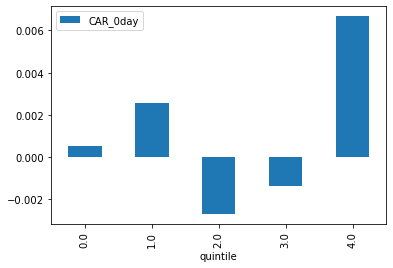

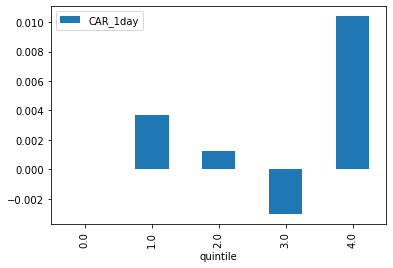

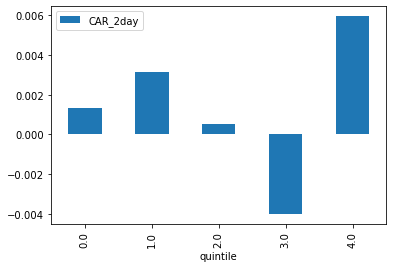

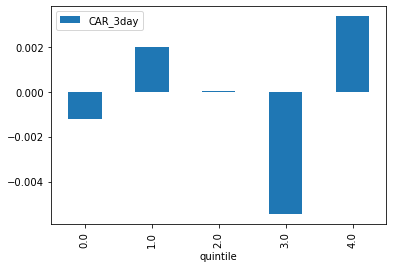

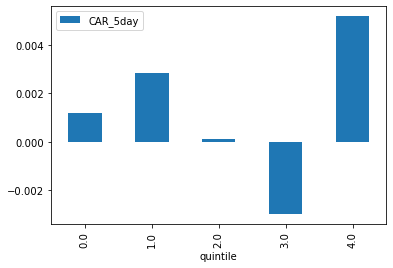

In [480]:
# to plot the mean cumulative abnormal returns for 0, 1, 2, 3, and 5 days based on quintile
dsf_filing_merged.groupby(by='quintile')[['CAR_0day']].mean().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAR_1day']].mean().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAR_2day']].mean().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAR_3day']].mean().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAR_5day']].mean().plot(kind='bar')

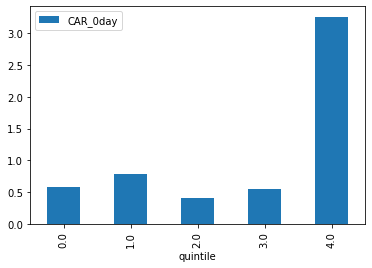

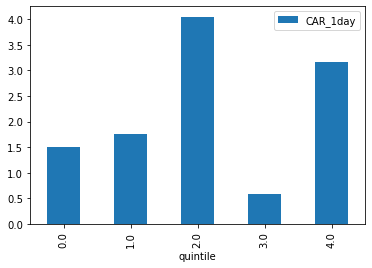

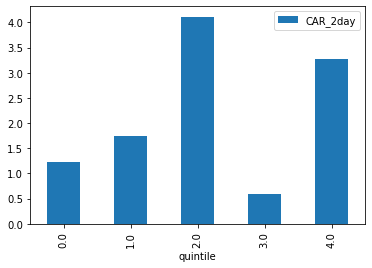

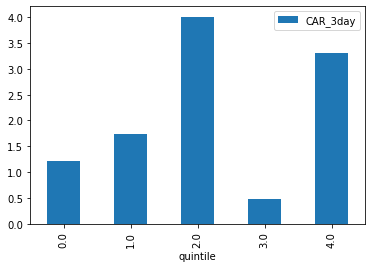

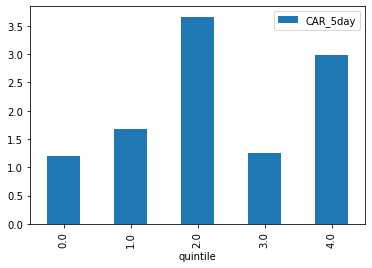

In [481]:
# to plot the maximum cumulative abnormal returns for 0, 1, 2, 3, and 5 days based on quintile
dsf_filing_merged.groupby(by='quintile')[['CAR_0day']].max().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAR_1day']].max().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAR_2day']].max().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAR_3day']].max().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAR_5day']].max().plot(kind='bar')

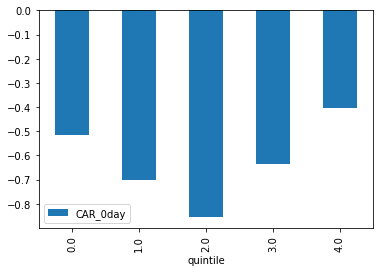

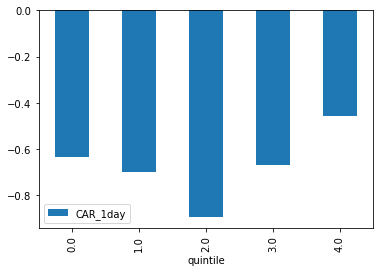

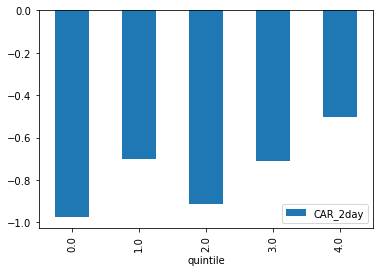

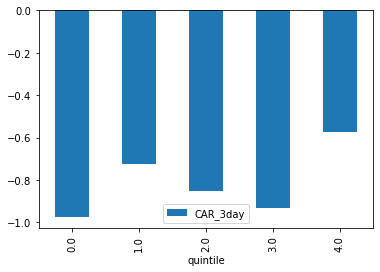

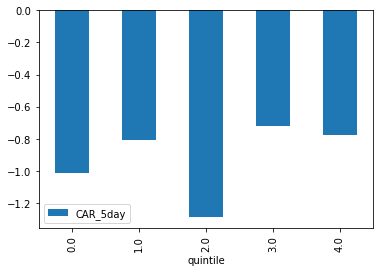

In [483]:
# to plot the minimum cumulative abnormal returns for 0, 1, 2, 3, and 5 days based on quintile
dsf_filing_merged.groupby(by='quintile')[['CAR_0day']].min().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAR_1day']].min().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAR_2day']].min().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAR_3day']].min().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAR_5day']].min().plot(kind='bar')

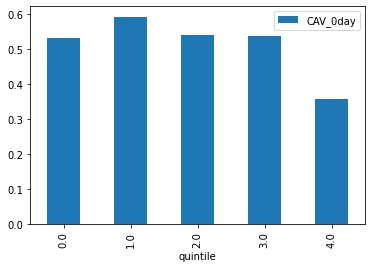

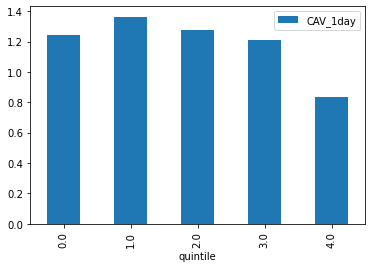

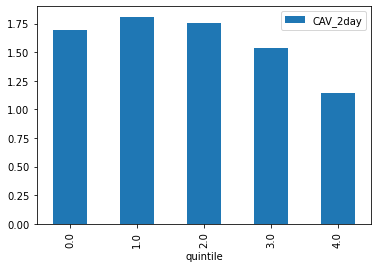

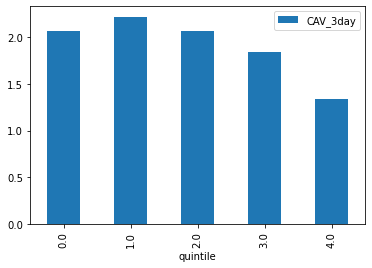

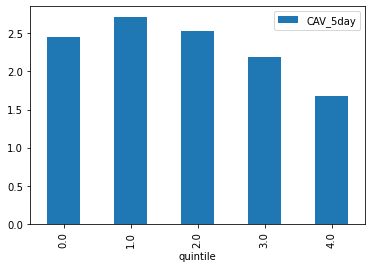

In [484]:
# to plot the mean cumulative abnormal volumes for 0, 1, 2, 3, and 5 days based on quintile
dsf_filing_merged.groupby(by='quintile')[['CAV_0day']].mean().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAV_1day']].mean().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAV_2day']].mean().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAV_3day']].mean().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAV_5day']].mean().plot(kind='bar')

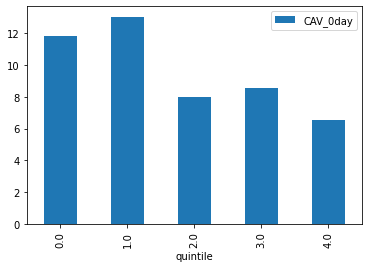

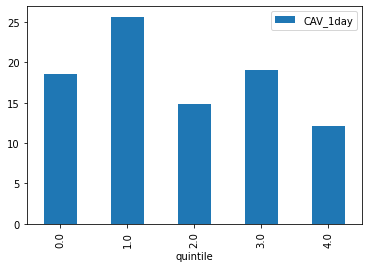

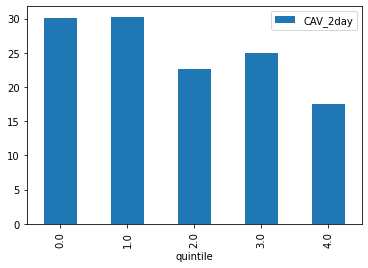

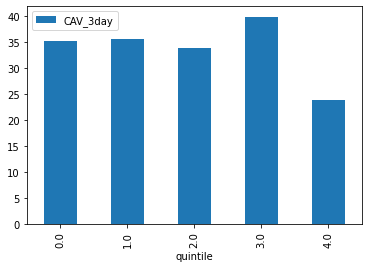

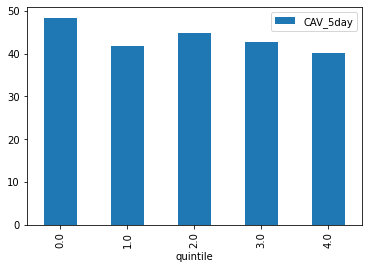

In [485]:
# to plot the maximum cumulative abnormal volumes for 0, 1, 2, 3, and 5 days based on quintile
dsf_filing_merged.groupby(by='quintile')[['CAV_0day']].max().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAV_1day']].max().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAV_2day']].max().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAV_3day']].max().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAV_5day']].max().plot(kind='bar')

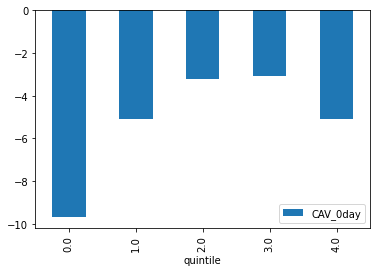

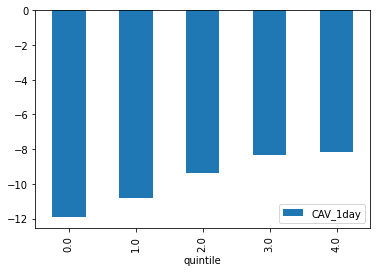

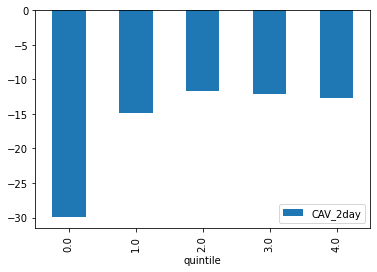

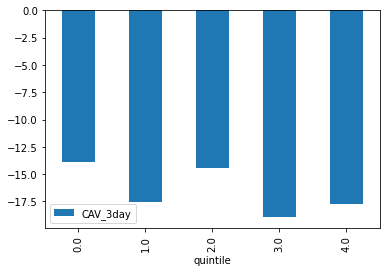

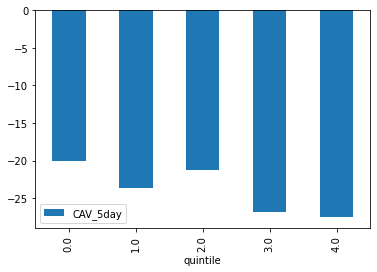

In [486]:
# to plot the minimum cumulative abnormal volumes for 0, 1, 2, 3, and 5 days based on quintile
dsf_filing_merged.groupby(by='quintile')[['CAV_0day']].min().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAV_1day']].min().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAV_2day']].min().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAV_3day']].min().plot(kind='bar')
dsf_filing_merged.groupby(by='quintile')[['CAV_5day']].min().plot(kind='bar')

##### summary
In general, the sentiments tends to be positively related to the stock returns in the 0 to 5 day windows. Specifically, the descriptive tables show that the quintile with the most positive has significantly higher returns from all the 0 to 5 day windows. Meanwhile, the extremely high returns as measured by the 75th percentile and the maximum returns tend to stay within the highest quintile for the most positive returns. Similarly, stocks that have the most negative sentiment tones for the 8-K filings tend to show lower returns as measured by the 25th percentile as well as the very low minimum returns.

Meanwhile,the quitile with the most positive sentiments tends to have the lowest abnormal volumes; the filings with the most negative sentiments also have increased abnormal trading volume from 0 to 5day windows; the one with most cumulative abnormal volumes tend to be in the 3d quintile. The most extreme increases in cumulative abnormal volumes tend to be located within the bottom quintile for the 8-K sentiments.

### Step 2: Advanced Sentiment Analysis

In [258]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
from bs4 import BeautifulSoup
import re

In [ ]:
#to get the sentiment intensity for 8-K filings based on average sentence tones

sid = SentimentIntensityAnalyzer()

for index, row in extracted_8k_filing.iterrows():

    path = row.Path
    url = 'https://www.sec.gov/Archives/{}'.format(path)
    file = requests.get(url)
    soup = BeautifulSoup(file.content, 'lxml')
    #soup.find_all('text')
    
    # to decompose the tables and headers from the 8-K filings
    selects = soup.find_all(['table','ims-header'])
    for match in selects:
        try:
            match.decompose()
        except Exception:
            pass
        
    paragraphs = soup.html.body.get_text(' ',strip = True)
    tokenized_sentences = nltk.tokenize.sent_tokenize(paragraphs)
   
    average_tone = 0
    for sentence in tokenized_sentences:
        try:
            ss = sid.polarity_scores(sentence)
            sentence_tone = ss['pos']-ss['neg']
            average_tone += sentence_tone
        except Exception:
            pass
    average_tone = average_tone/len(tokenized_sentences)
    
    extracted_8k_filing.loc[index,'NLTK'] = average_tone

In [371]:
extracted_8k_filing['NLTK_quintile'] = extracted_8k_filing.groupby(by="YEAR")['NLTK'].\
                                  transform(lambda x: pd.qcut(x, 5, labels=False, duplicates='drop'))

In [ ]:
dsf_filings['DATE'] = pd.to_datetime(dsf_filings['DATE'],format='%Y-%m-%d')
extracted_8k_filing['Date Filed'] = pd.to_datetime(extracted_8k_filing['Date Filed'], format='%Y-%m-%d')

In [409]:
NLTK_quintiles_dsf_filing = dsf_filings.merge(extracted_8k_filing[['NLTK_quintile','Date Filed', 'CIK']], how='left',\
                                              left_on = (['DATE', 'CIK']), right_on = ['Date Filed', 'CIK'])

In [ ]:
#dsf_filings = dsf_filing_merged[dsf_filing_merged.quintile>=0]
dsf_filings['DATE'] = pd.to_datetime(dsf_filings['DATE'],format='%Y-%m-%d')

In [412]:
#to get the descriptive stats for the CAVs based on different quintiles of NLTK sentiments
NLTK_quintiles_dsf_filing.groupby(by='NLTK_quintile')[['CAR_0day', 'CAR_1day',
       'CAR_2day', 'CAR_3day', 'CAR_5day']].describe().T

NLTK_quintile           0.0          1.0          2.0          3.0         4.0
CAR_0day count  1146.000000  1186.000000  1154.000000  1091.000000  968.000000
         mean     -0.001955     0.000895    -0.000123     0.000835    0.002597
         std       0.057399     0.116727     0.052032     0.063851    0.053363
         min      -0.551393    -0.856471    -0.404040    -0.633785   -0.511643
         25%      -0.017342    -0.015641    -0.014671    -0.014209   -0.013924
         50%      -0.000966    -0.001520    -0.000149    -0.000236   -0.000790
         75%       0.014925     0.014363     0.015114     0.014196    0.012472
         max       0.437239     3.263048     0.541021     0.576065    0.412566
CAR_1day count  1145.000000  1186.000000  1152.000000  1091.000000  968.000000
         mean     -0.001189    -0.003311     0.001813     0.000222    0.012960
         std       0.083002     0.131958     0.083316     0.084914    0.167328
         min      -0.830450    -0.895638    -0.528982    -0.668168   -0.652740
         25%      -0.025994    -0.028551    -0.026745    -0.024067   -0.020716
         50%      -0.000027    -0.002257     0.000188    -0.001769    0.000220
         75%       0.025649     0.025047     0.027306     0.024323    0.022502
         max       0.815884     3.158085     0.947038     0.672224    4.052299
CAR_2day count  1145.000000  1186.000000  1151.000000  1091.000000  968.000000
         mean     -0.004702    -0.003520    -0.000347     0.000407    0.015386
         std       0.090350     0.140673     0.093988     0.094061    0.169360
         min      -0.773908    -0.977037    -0.706847    -0.710040   -0.701720
         25%      -0.032905    -0.035006    -0.031902    -0.029488   -0.022864
         50%      -0.001874     0.000488    -0.001289    -0.001082    0.000279
         75%       0.030762     0.031155     0.027224     0.027630    0.029328
         max       0.772956     3.276979     0.981739     0.768482    4.112349
CAR_3day count  1145.000000  1186.000000  1150.000000  1090.000000  967.000000
         mean     -0.006633    -0.002269    -0.003861    -0.000815    0.013283
         std       0.100679     0.143203     0.105531     0.100168    0.169757
         min      -0.724429    -0.977037    -0.931890    -0.752911   -0.701720
         25%      -0.037858    -0.038855    -0.036446    -0.034726   -0.025003
         50%      -0.003519     0.000437    -0.003331    -0.001335    0.002561
         75%       0.034331     0.034034     0.031206     0.032684    0.032587
         max       0.772956     3.307887     0.981739     0.802260    4.009383
CAR_5day count  1144.000000  1185.000000  1149.000000  1090.000000  967.000000
         mean     -0.002113    -0.000741    -0.005640    -0.001204    0.016449
         std       0.120089     0.154348     0.121101     0.116668    0.181259
         min      -0.810170    -1.015312    -1.291130    -0.703942   -0.780176
         25%      -0.044541    -0.043788    -0.042573    -0.040980   -0.034812
         50%      -0.001606    -0.001121    -0.004616    -0.001711   -0.001087
         75%       0.041754     0.041729     0.035156     0.038839    0.036792
         max       0.996571     2.983043     1.242005     0.703893    3.660989

In [413]:
#to get the descriptive stats for the CARs based on different quintiles of NLTK sentiments
NLTK_quintiles_dsf_filing.groupby(by='NLTK_quintile')[['CAV_0day', 'CAV_1day',
                        'CAV_2day', 'CAV_3day', 'CAV_5day']].describe().T

NLTK_quintile           0.0          1.0          2.0          3.0  \
CAV_0day count  1216.000000  1254.000000  1217.000000  1147.000000   
         mean      0.578569     0.513989     0.561595     0.593067   
         std       1.429004     1.354296     1.472649     1.578666   
         min      -5.094989    -4.478023    -9.702816    -3.167787   
         25%      -0.396135    -0.321555    -0.381979    -0.400994   
         50%       0.457168     0.437355     0.452839     0.428193   
         75%       1.395047     1.184689     1.265665     1.310333   
         max       8.400285     9.594737     8.579098    13.038910   
CAV_1day count  1216.000000  1254.000000  1214.000000  1144.000000   
         mean      1.228190     1.256680     1.331396     1.333454   
         std       3.231074     3.174229     3.321339     3.468859   
         min      -9.387092    -8.140305    -9.692665   -10.791709   
         25%      -1.003881    -0.814818    -0.844818    -0.928481   
         50%       1.038588     1.016719     0.998100     0.963171   
         75%       3.170418     3.022986     3.096575     3.268064   
         max      14.202004    19.867785    19.115578    25.662899   
CAV_2day count  1214.000000  1253.000000  1212.000000  1144.000000   
         mean      1.604742     1.637100     1.780053     1.845626   
         std       4.678461     4.708730     4.797972     5.041141   
         min     -10.428679   -12.716675   -12.065739   -14.848672   
         25%      -1.709728    -1.559855    -1.351028    -1.444782   
         50%       1.342148     1.304550     1.341715     1.227647   
         75%       4.336502     4.084932     4.347180     4.557598   
         max      19.454821    27.055174    24.891563    30.263427   
CAV_3day count  1213.000000  1252.000000  1211.000000  1144.000000   
         mean      1.931424     1.942723     2.136567     2.189113   
         std       6.040656     6.139871     6.222633     6.500853   
         min     -13.426349   -16.690668   -13.845878   -17.702107   
         25%      -2.220223    -1.997246    -1.993709    -2.224741   
         50%       1.622677     1.420781     1.512705     1.670078   
         75%       5.762396     5.205334     5.620192     5.685574   
         max      25.433671    33.859692    29.037830    35.700646   
CAV_5day count  1211.000000  1249.000000  1210.000000  1144.000000   
         mean      2.423132     2.368597     2.602206     2.563425   
         std       8.543918     8.641193     8.726833     9.026471   
         min     -20.565430   -27.567673   -20.551630   -23.617663   
         25%      -3.239114    -3.273102    -3.031417    -3.751905   
         50%       1.870981     1.650494     1.717438     1.948543   
         75%       7.661089     6.976853     7.510097     7.805879   
         max      41.640852    44.867117    43.723820    41.117730   

NLTK_quintile           4.0  
CAV_0day count  1023.000000  
         mean      0.355020  
         std       1.439633  
         min      -6.502444  
         25%      -0.545574  
         50%       0.264548  
         75%       1.069625  
         max       7.533150  
CAV_1day count  1022.000000  
         mean      0.905313  
         std       3.377099  
         min     -11.931212  
         25%      -1.240748  
         50%       0.585274  
         75%       2.634935  
         max      14.939710  
CAV_2day count  1022.000000  
         mean      1.256925  
         std       5.113774  
         min     -29.988518  
         25%      -1.954648  
         50%       0.866466  
         75%       3.961021  
         max      30.110593  
CAV_3day count  1019.000000  
         mean      1.562781  
         std       6.634606  
         min     -18.964466  
         25%      -2.629822  
         50%       0.980247  
         75%       5.138465  
         max      39.924059  
CAV_5day count  1018.000000  
         mean      1.864293  
         std       9.223342  
         min     -26.833236  
         25%      -

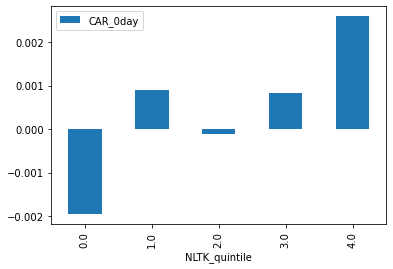

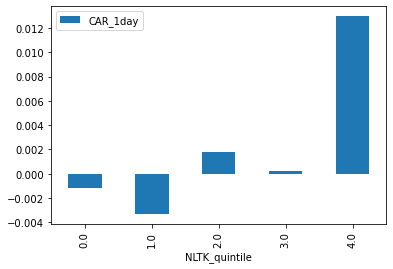

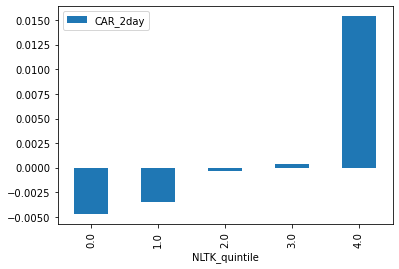

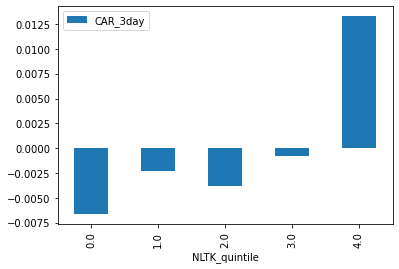

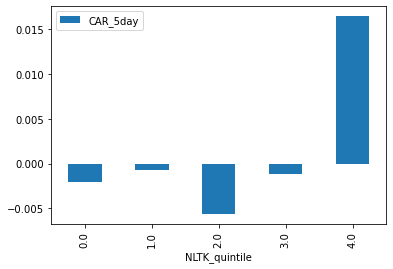

In [489]:
#to plot average cumulative abnormal returns for 0, 1, 2, 3, and 5 days based on quintile of advanced sentiment analysis
NLTK_quintiles_dsf_filing.groupby(by='NLTK_quintile')[['CAR_0day']].mean().plot(kind='bar')
NLTK_quintiles_dsf_filing.groupby(by='NLTK_quintile')[['CAR_1day']].mean().plot(kind='bar')
NLTK_quintiles_dsf_filing.groupby(by='NLTK_quintile')[['CAR_2day']].mean().plot(kind='bar')
NLTK_quintiles_dsf_filing.groupby(by='NLTK_quintile')[['CAR_3day']].mean().plot(kind='bar')
NLTK_quintiles_dsf_filing.groupby(by='NLTK_quintile')[['CAR_5day']].mean().plot(kind='bar')

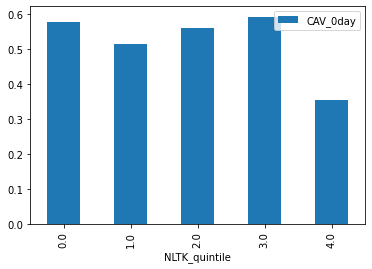

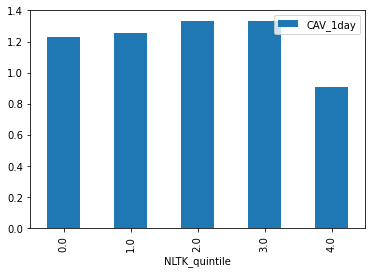

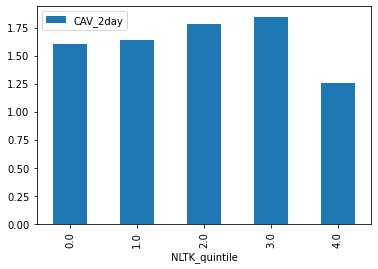

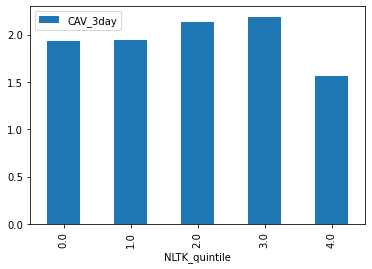

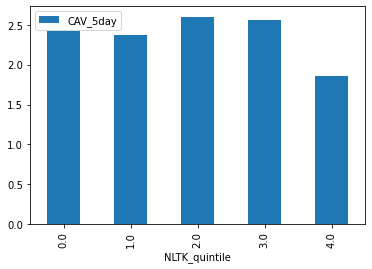

In [490]:
# to plot average cumulative abnormal volumes for 0, 1, 2, 3, and 5 days based on quintile of advanced sentiment analysis
NLTK_quintiles_dsf_filing.groupby(by='NLTK_quintile')[['CAV_0day']].mean().plot(kind='bar')
NLTK_quintiles_dsf_filing.groupby(by='NLTK_quintile')[['CAV_1day']].mean().plot(kind='bar')
NLTK_quintiles_dsf_filing.groupby(by='NLTK_quintile')[['CAV_2day']].mean().plot(kind='bar')
NLTK_quintiles_dsf_filing.groupby(by='NLTK_quintile')[['CAV_3day']].mean().plot(kind='bar')
NLTK_quintiles_dsf_filing.groupby(by='NLTK_quintile')[['CAV_5day']].mean().plot(kind='bar')

##### summary
Results from NLTK is quite similar to the results from rudimentary sentiment analysis. Positive sentiments tends to be positively related to the cumulative abnormal stock returns in the 0 to 5 day windows and negatively related to the cumulative abnormal trading volumes. 
However the results from NLTK seems more salient in capturing how the filing's sentiments work to affect the cumulative abnormal returns and trading volumes. NLTK seems especially better than rudimentary sentiment analysis when it comes to the abnormal cumulative returns, in that almost all the highest abnormal returns are located in the 5th quintile of the sentiment and almost all the lowest abnormal returns are located in the 1st quintile.